In [16]:
from tqdm.notebook import tqdm
import pandas as pd
import pickle
import numpy as np

In [7]:
f = open("./source/dmoz_domain_category.tab")

In [8]:
dmoz_map = {
    "domain": [],
    "category": []
}

for l in f:
    read_list = l.strip().split("\t")
    if read_list[0][1:-1] == 'domain':
        continue
    dmoz_map['domain'].append(read_list[0][1:-1])
    dmoz_map['category'].append(read_list[1][1:-1])

In [9]:
dmoz_df = pd.DataFrame.from_dict(dmoz_map)

In [10]:
dmoz_list = []
for i in dmoz_df['category'].unique():
    dmoz_list.append(i.split('/'))

In [43]:
labels = ['Home', 'Society', 'Business', 'Arts', 'Recreation', 'Health',
 'News', 'Computers', 'Sports', 'Games', 'Reference', 'Science', 'Shopping']

label_dict = {}
for label in labels:
    label_dict[label] = []

In [44]:
for i in range(len(dmoz_list)):
    if dmoz_list[i][1] in labels:
        label_dict[dmoz_list[i][1]].append(i)

In [41]:
with open('label_dict.pickle', 'wb') as handle:
    pickle.dump(label_dict, handle)

In [11]:
with open('label_dict.pickle', 'rb') as handle:
    label_dict = pickle.load(handle)

In [42]:
dmoz_df['label'] = np.nan
for key, value in label_dict.items():
    dmoz_df.loc[value, 'label'] = key
    

In [47]:
with open('./source/domz_df.pickle', 'wb') as handle:
    pickle.dump(dmoz_df, handle)

In [10]:
category = []
for i in dmoz_list:
    category.append(i[1])

In [25]:
x_axis = []
cate_number = []
for cate in ['Home',
 'Society',
 'Business',
 'Arts',
 'Recreation',
 'Health',
 'News',
 'Computers',
 'Sports',
 'Games',
 'Reference',
 'Science',
 'Shopping']:
    print (cate,':',category.count(cate))
    x_axis.append(cate)
    cate_number.append(category.count(cate))

Home : 1864
Society : 29762
Business : 26299
Arts : 21584
Recreation : 13445
Health : 7529
News : 1738
Computers : 9956
Sports : 13112
Games : 3478
Reference : 11506
Science : 8683
Shopping : 9222


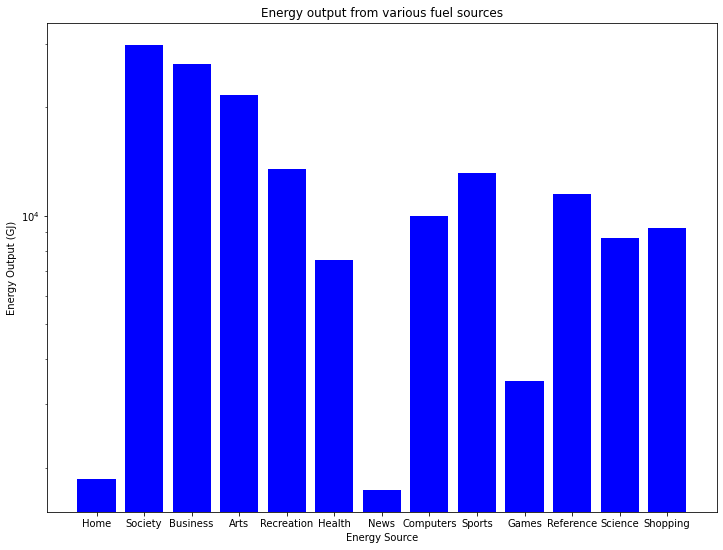

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

x = x_axis
# energy = cate_number

x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(12,9))

plt.bar(x_pos, cate_number, color='b')
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")
plt.yscale('log')
plt.xticks(x_pos, x)
plt.show()

In [61]:
import os
import sys
import subprocess
import urllib.request

def extractor(site):
    '''Extract tables from a single or a list of urls or html filenames passed.'''
    header = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
      "X-Requested-With": "XMLHttpRequest"}

    if len(site.split('//'))>1:
        fname = site.split('//')[1]
    else:
        fname = site
        site = 'http://'+site

    print('Extracting tables from: ' + site)

    try:
        req=urllib.request.Request(site, headers=header)
        content = urllib.request.urlopen(req).read()
        df1= pd.read_html(content)
    except Exception as e:
        df1=[]
        print(e)

    return df1


In [52]:
dmoz_df[dmoz_df['label'] == 'Computers']['']

,domain,category,label
1,www.232analyzer.com,Top/Computers/Hardware/Test_Equipment/Analyzers,Computers
11,www.utahwebdesign.com,Top/Computers/Internet/Web_Design_and_Developm...,Computers
26,www.memtest86.com,Top/Computers/Software/Diagnostics,Computers
266,themebutler.com,Top/Computers/Internet/On_the_Web/Weblogs/Temp...,Computers
292,googlesystem.blogspot.com,"Top/Computers/Companies/Google,_Inc./News_and_...",Computers
...,...,...,...
698581,www.x.org,Top/Computers/Software/Operating_Systems/Graph...,Computers
698587,www.atcopres.org,Top/Regional/North_America/United_States/New_J...,Computers
698653,www.warwickcrystal.co.uk,"Top/Shopping/Gifts/Personalized/China,_Porcela...",Computers
698654,www.avon.co.jp,Top/World/Japanese/business/Products_and_servi...,Computers


In [63]:

url = 'https://en.m.wikipedia.org/wiki/League_of_Legends'
df1 = extractor(url)

Extracting tables from: https://en.m.wikipedia.org/wiki/League_of_Legends
[   League of Legends                                League of Legends.1
0                NaN                                                NaN
1       Developer(s)                                         Riot Games
2       Publisher(s)                            Riot GamesTencentGarena
3        Director(s)            Andrei van RoonSteven SnowTravis George
4        Producer(s)        Jessica NamJoe TungSteven SnowTravis George
5        Designer(s)  Mark YetterRyan MirelesDavid CapurroChristina ...
6          Artist(s)  Gem LimOscar MonteonDaniel KimYekaterina Boury...
7          Writer(s)  Ariel LawrenceMatthew Garcia-DunnAnthony Reyno...
8        Composer(s)            Christian LinkeToa DunnSebastien Najand
9        Platform(s)                           Microsoft Windows, macOS
10           Release                                   October 27, 2009
11          Genre(s)                                         

In [60]:
df1[2]

Aggregate score               
       Aggregator          Score
0      Metacritic     78/100[92]
1   Review scores  Review scores
2     Publication          Score
3         1Up.com         A-[93]
4       Eurogamer       8/10[94]
5  GameRevolution         B+[95]
6         GameSpy           [96]
7        GameZone       9/10[97]
8             IGN     9.2/10[98]